Raw data:
  x1   x2     y
60.0 22.0 140.0
62.0 25.0 155.0
67.0 24.0 159.0
70.0 20.0 179.0
71.0 15.0 192.0
72.0 14.0 200.0
75.0 14.0 212.0
78.0 11.0 215.0

Design matrix X (rows = [1, x1, x2]):
[[ 1. 60. 22.]
 [ 1. 62. 25.]
 [ 1. 67. 24.]
 [ 1. 70. 20.]
 [ 1. 71. 15.]
 [ 1. 72. 14.]
 [ 1. 75. 14.]
 [ 1. 78. 11.]]

Closed-form coefficients (beta):
beta0 (intercept) = -6.867487248
beta1 (x1)        = 3.147893103
beta2 (x2)        = -1.656143269

Closed-form performance:
SSE = 203.441661, SST = 5442.000000
R^2 = 0.962616, RMSE = 6.378741

Sklearn coefficients (for comparison):
intercept = -6.867487248, coef_x1 = 3.147893103, coef_x2 = -1.656143269
Sklearn R^2 = 0.962616, RMSE = 5.042837

Coefficients comparison:
        parameter  closed_form   sklearn
beta0 (intercept)    -6.867487 -6.867487
       beta1 (x1)     3.147893  3.147893
       beta2 (x2)    -1.656143 -1.656143

Predictions and residuals:
  x1   x2  y_true  y_hat_closed  residual_closed  y_hat_sklearn  residual_sklearn
60.0 22.

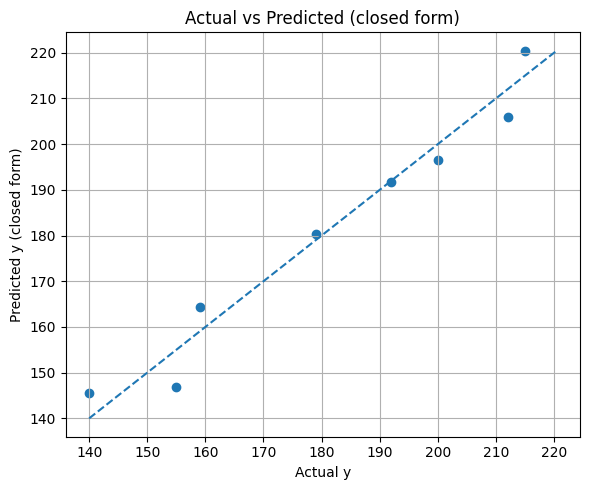

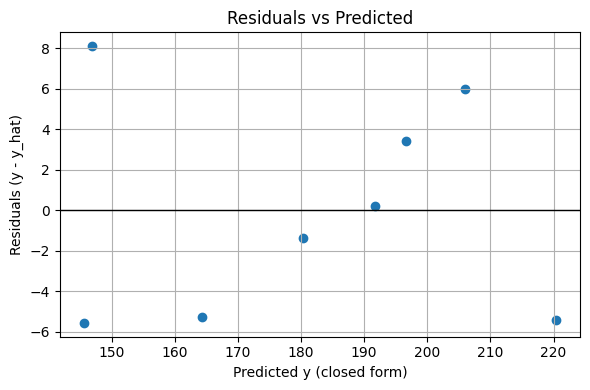

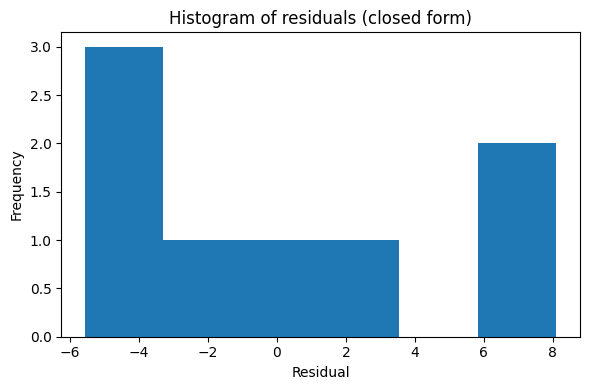

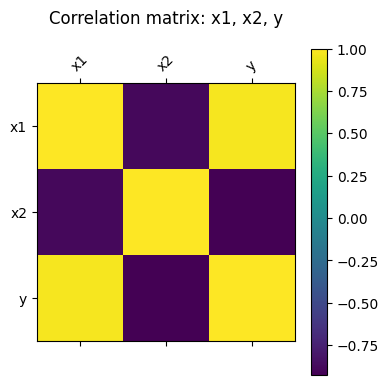


Plots saved to ml_outputs (PNG files).

Done.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# -----------------------------
# 1) Data (your provided values)
# -----------------------------
x1 = np.array([60, 62, 67, 70, 71, 72, 75, 78], dtype=float)
x2 = np.array([22, 25, 24, 20, 15, 14, 14, 11], dtype=float)
y  = np.array([140,155,159,179,192,200,212,215], dtype=float)

df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})
print("Raw data:")
print(df.to_string(index=False))

# -----------------------------
# 2) Build design matrix X
#    (first column = 1 for intercept)
# -----------------------------
n = len(x1)
X = np.column_stack((np.ones(n), x1, x2))   # shape (n, 3)
print("\nDesign matrix X (rows = [1, x1, x2]):")
print(X)

# -----------------------------
# 3) Normal equation (closed-form)
#    beta = (X^T X)^{-1} X^T y
# -----------------------------
XtX = X.T @ X
Xty = X.T @ y

# check invertibility (simple)
det = np.linalg.det(XtX)
if abs(det) < 1e-12:
    raise RuntimeError("X^T X is singular or nearly singular (det ~ 0). Can't invert.")
XtX_inv = np.linalg.inv(XtX)
beta_closed = XtX_inv @ Xty   # [beta0, beta1, beta2]

print("\nClosed-form coefficients (beta):")
print(f"beta0 (intercept) = {beta_closed[0]:.9f}")
print(f"beta1 (x1)        = {beta_closed[1]:.9f}")
print(f"beta2 (x2)        = {beta_closed[2]:.9f}")

# -----------------------------
# 4) Predictions & residuals (closed form)
# -----------------------------
y_hat_closed = X @ beta_closed
residuals_closed = y - y_hat_closed
SSE = (residuals_closed**2).sum()
SST = ((y - y.mean())**2).sum()
MSE = SSE / (n - X.shape[1])   # degrees of freedom n - p (p = number of parameters)
RMSE = np.sqrt(MSE)
R2_closed = 1 - SSE / SST

print("\nClosed-form performance:")
print(f"SSE = {SSE:.6f}, SST = {SST:.6f}")
print(f"R^2 = {R2_closed:.6f}, RMSE = {RMSE:.6f}")

# -----------------------------
# 5) Fit with sklearn for comparison
# -----------------------------
model = LinearRegression()
model.fit(df[["x1","x2"]], df["y"])
beta_sklearn = np.hstack([model.intercept_, model.coef_])
y_hat_sklearn = model.predict(df[["x1","x2"]])
R2_sklearn = r2_score(df["y"].values, y_hat_sklearn)
RMSE_sklearn = np.sqrt(mean_squared_error(df["y"].values, y_hat_sklearn))

print("\nSklearn coefficients (for comparison):")
print(f"intercept = {beta_sklearn[0]:.9f}, coef_x1 = {beta_sklearn[1]:.9f}, coef_x2 = {beta_sklearn[2]:.9f}")
print(f"Sklearn R^2 = {R2_sklearn:.6f}, RMSE = {RMSE_sklearn:.6f}")

# ----------------------------
# ----------------------------
# 6) Prepare results table
# -----------------------------
results = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y_true": y,
    "y_hat_closed": np.round(y_hat_closed, 6),
    "residual_closed": np.round(residuals_closed, 6),
    "y_hat_sklearn": np.round(y_hat_sklearn, 6),
    "residual_sklearn": np.round(y - y_hat_sklearn, 6)
})

coeff_table = pd.DataFrame({
    "parameter": ["beta0 (intercept)", "beta1 (x1)", "beta2 (x2)"],
    "closed_form": np.round(beta_closed, 9),
    "sklearn": np.round(beta_sklearn, 9)
})

print("\nCoefficients comparison:")
print(coeff_table.to_string(index=False))
print("\nPredictions and residuals:")
print(results.to_string(index=False))

# -----------------------------
# 7) Save CSV outputs
# -----------------------------
out_dir = "ml_outputs"
os.makedirs(out_dir, exist_ok=True)
results.to_csv(os.path.join(out_dir, "predictions_residuals.csv"), index=False)
coeff_table.to_csv(os.path.join(out_dir, "coefficients_comparison.csv"), index=False)
print(f"\nSaved CSVs to folder: {out_dir}")

# -----------------------------
# 8) Plots: Actual vs Predicted, Residuals, Histogram, Correlation
# -----------------------------
# 8.1 Actual vs Predicted (closed form)
plt.figure(figsize=(6,5))
plt.scatter(y, y_hat_closed)
minv, maxv = min(y.min(), y_hat_closed.min()), max(y.max(), y_hat_closed.max())
plt.plot([minv, maxv], [minv, maxv], linestyle='--')
plt.xlabel("Actual y")
plt.ylabel("Predicted y (closed form)")
plt.title("Actual vs Predicted (closed form)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "actual_vs_predicted.png"))
plt.show()

# 8.2 Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_hat_closed, residuals_closed)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Predicted y (closed form)")
plt.ylabel("Residuals (y - y_hat)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "residuals_vs_predicted.png"))
plt.show()

# 8.3 Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(residuals_closed, bins=6)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of residuals (closed form)")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "residuals_histogram.png"))
plt.show()

# 8.4 Correlation matrix heatmap (simple)
corr = df.corr()
fig, ax = plt.subplots(figsize=(4,4))
cax = ax.matshow(corr, cmap='viridis')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation matrix: x1, x2, y", pad=20)
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "correlation_matrix.png"))
plt.show()

print(f"\nPlots saved to {out_dir} (PNG files).")
print("\nDone.")